# Settings & Initialisation

In [1]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

from comtrade.analysis import Analysis
tta = Analysis()

## Reporter Area

In [2]:
from comtrade.code.reporter_area import ReporterArea
reporter_area = ReporterArea()
reporter_area_ids = reporter_area.get_ids("India")
reporter_area_ids

[{'id': '699', 'text': 'India'}, {'id': '356', 'text': 'India, excl. Sikkim'}]

## Partner Area

In [3]:
from comtrade.code.partner_area import PartnerArea
partner_area = PartnerArea()
partner_area_ids = partner_area.get_ids("Japan")
partner_area_ids

[{'id': '392', 'text': 'Japan'}]

## Trade Regime

In [4]:
from comtrade.code.trade_regime import TradeRegime
trade_regime = TradeRegime()
trade_regime_ids = trade_regime.get_ids("Export")
trade_regime_ids

[{'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}]

## Data availability request

In [5]:
source = 699 # India
destination = 392 # Japan
tta.set_source_destination(source, destination)

# source_status = tta.source_data_available()
# print(source_status)
# destination_status = tta.destination_data_available()
# print(destination_status)

## Data request

In [6]:
data = tta.compare_export(2019, 'AG4')

{'r': 699, 'p': 392, 'rg': 2, 'ps': 2019, 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}
{'r': 392, 'p': 699, 'rg': 1, 'ps': 2019, 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}


## Data Frame

In [8]:
import pandas as pd
pd.set_option('display.max_rows', 5000)

In [33]:
df = pd.DataFrame.from_dict(data, orient='index')
df['value_diff'] = df['value_a'] - df['value_b']
df['quantity_diff'] = df['quantity_a'] - df['quantity_b']
df.sort_values(by=['code'])
df.to_csv('in_jp_2019_ag4.csv')
df

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff
0602,0602,"Plants, live; n.e.c. in heading no. 0601, (inc...",60957,No Quantity,955037,14172,Weight in kilograms,1325251,-370214,46785
1703,1703,Molasses; resulting from the extraction or ref...,6862,No Quantity,1663,0,No Quantity,0,1663,6862
4012,4012,Retreaded or used pneumatic tyres of rubber; s...,3195,No Quantity,9642,6086,No Quantity,54478,-44836,-2891
4202,4202,"Trunks; suit, camera, jewellery, cutlery cases...",400871,No Quantity,31326924,2195264,No Quantity,77662946,-46336022,-1794393
5905,5905,Textile wall coverings,1260,No Quantity,13401,195,Area in square metres,18385,-4984,1065
6117,6117,"Clothing accessories; made up, knitted or croc...",2971,No Quantity,161281,818,No Quantity,74488,86793,2153
6207,6207,"Singlets and other vests, underpants, briefs, ...",32957,No Quantity,773630,81586,No Quantity,1324141,-550511,-48629
6208,6208,"Singlets and other vests, slips, petticoats, b...",110497,No Quantity,3003055,136177,No Quantity,2685238,317817,-25680
6210,6210,Garments made up of fabrics of heading no. 560...,2949,No Quantity,179205,3437,No Quantity,354531,-175326,-488
6211,6211,"Track suits, swimwear and other garments (not ...",274991,No Quantity,12743383,741879,No Quantity,13377262,-633879,-466888


In [32]:
# Get names of indexes for which column value_diff is less than 1000
indexNames = df[  (df['value_diff'] <= 1000)  ].index
# Delete these row indexes from dataFrame
df = df.drop(indexNames , inplace=True)
# Get names of indexes for which column value_diff is greater than -1000
indexNames = df[  (df['value_diff'] >= -1000)  ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df

TypeError: 'NoneType' object is not subscriptable

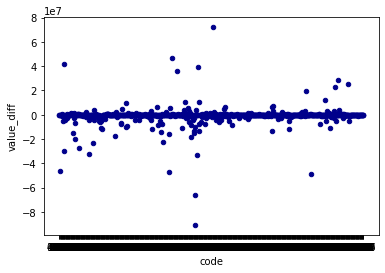

In [17]:
df.plot.scatter(x='code', y='value_diff', c='DarkBlue')